In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [3]:
dataset_cols = ["instant", "dteday", "season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit",
                "temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
df = pd.read_csv("/workspace/Machine-Learning-Studies/Supervise Learning/datasets/day.csv").drop(["hum","windspeed","instant","atemp","weathersit","dteday","casual","registered","season","yr","holiday","weekday","workingday"], axis=1)

In [4]:
df.head()

,mnth,temp,cnt
0,1,0.344167,985
1,1,0.363478,801
2,1,0.196364,1349
3,1,0.200000,1562
4,1,0.226957,1600


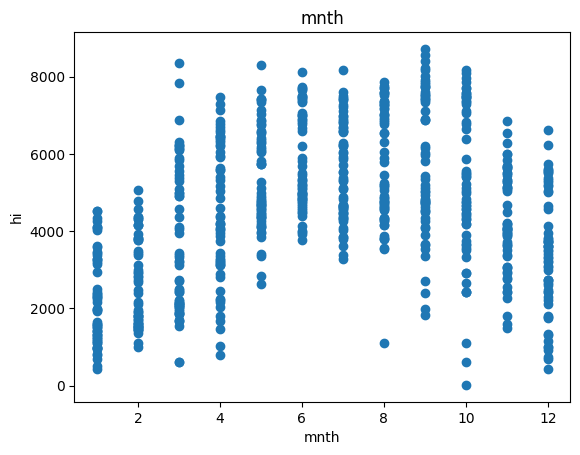

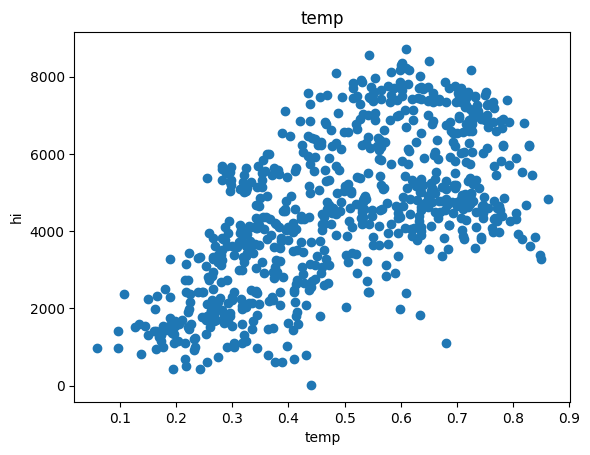

In [5]:
for label in df.columns[:-1]:
  plt.scatter(df[label], df["cnt"])
  plt.title(label)
  plt.ylabel("hi")
  plt.xlabel(label)
  plt.show()

In [8]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [9]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

In [10]:
_, X_train_temp, y_train_temp = get_xy(train, "cnt", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "cnt", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "cnt", x_labels=["temp"])

In [11]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [12]:
temp_reg.score(X_test_temp, y_test_temp)

0.39452855822506583

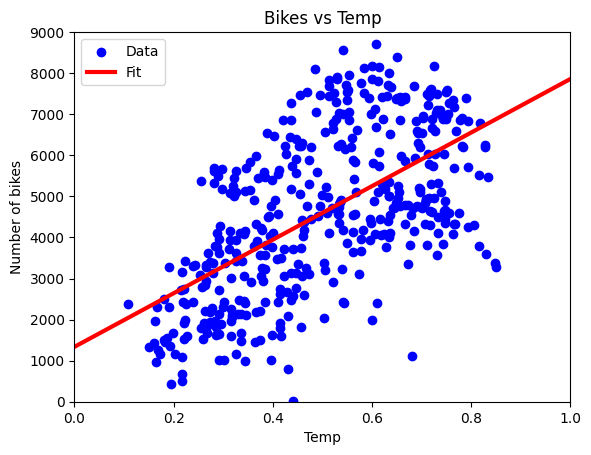

In [16]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.ylim(0, 9000)
plt.xlim(0,1)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [17]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "cnt", x_labels=df.columns[:-1])
_, X_val_all, y_val_all = get_xy(val, "cnt", x_labels=df.columns[:-1])
_, X_test_all, y_test_all = get_xy(test, "cnt", x_labels=df.columns[:-1])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [18]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [19]:
all_reg.score(X_test_all, y_test_all)

0.45835787099913317

In [20]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [21]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [22]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [23]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [38]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    epochs=30,
    verbose = 0,
    validation_data=(X_val_temp, y_val_temp)
)

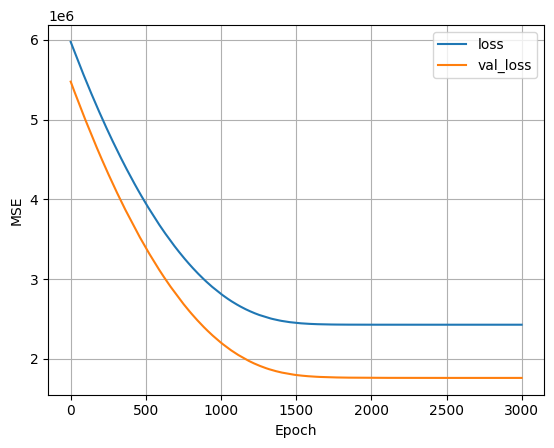

In [29]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


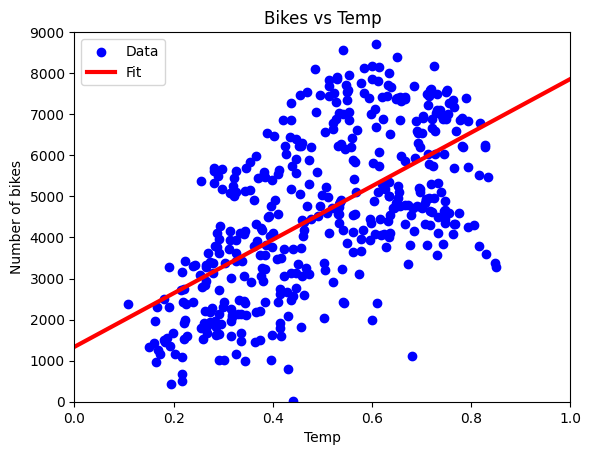

In [30]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.ylim(0, 9000)
plt.xlim(0,1)
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [32]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    tf.keras.layers.Normalization(input_shape=(1,), axis=None),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss='mean_squared_error')

In [33]:
# Lọc trong khoảng 0.1 đến 0.9
mask_train = (X_train_temp >= 0.1) & (X_train_temp <= 0.9)
X_train_filtered = X_train_temp[mask_train].reshape(-1, 1)
y_train_filtered = y_train_temp[mask_train]

mask_val = (X_val_temp >= 0.1) & (X_val_temp <= 0.9)
X_val_filtered = X_val_temp[mask_val].reshape(-1, 1)
y_val_filtered = y_val_temp[mask_val]

# Train
history = nn_model.fit(
    X_train_filtered, y_train_filtered,
    validation_data=(X_val_filtered, y_val_filtered),
    verbose=0,
    epochs=1000
)

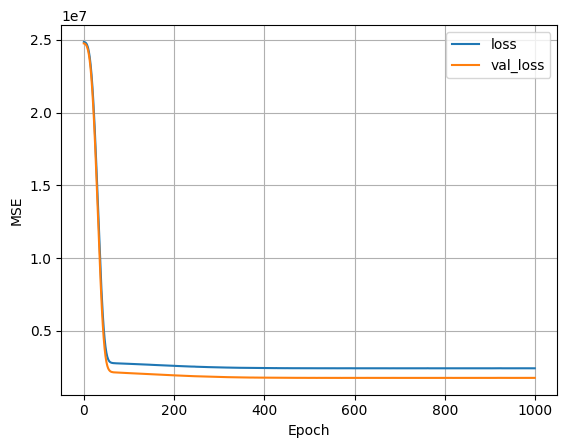

In [34]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


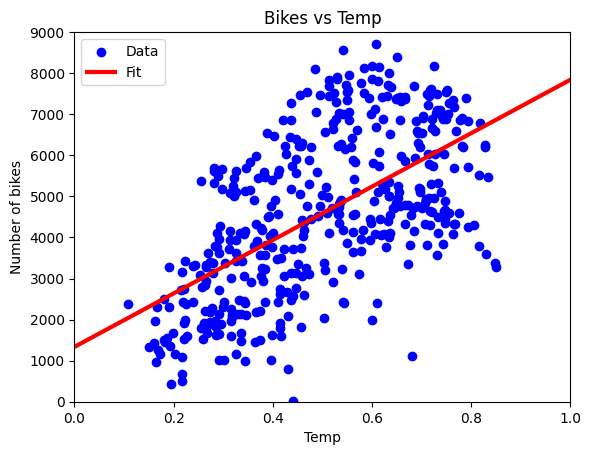

In [36]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.ylim(0, 9000)
plt.xlim(0,1)
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [37]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(2,), axis=-1)
all_normalizer.adapt(X_train_all)

In [40]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [41]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    epochs=200
)

Epoch 1/200
14/14 [==============================] - 1s 17ms/step - loss: 23754706.0000 - val_loss: 26630544.0000
Epoch 2/200
14/14 [==============================] - 0s 9ms/step - loss: 23751788.0000 - val_loss: 26627450.0000
Epoch 3/200
14/14 [==============================] - 0s 9ms/step - loss: 23748454.0000 - val_loss: 26623738.0000
Epoch 4/200
14/14 [==============================] - 0s 8ms/step - loss: 23744236.0000 - val_loss: 26618824.0000
Epoch 5/200
14/14 [==============================] - 0s 8ms/step - loss: 23738608.0000 - val_loss: 26611896.0000
Epoch 6/200
14/14 [==============================] - 0s 8ms/step - loss: 23730688.0000 - val_loss: 26602132.0000
Epoch 7/200
14/14 [==============================] - 0s 8ms/step - loss: 23719674.0000 - val_loss: 26588964.0000
Epoch 8/200
14/14 [==============================] - 0s 8ms/step - loss: 23705320.0000 - val_loss: 26572030.0000
Epoch 9/200
14/14 [==============================] - 0s 8ms/step - loss: 23687058.0000 - val_lo

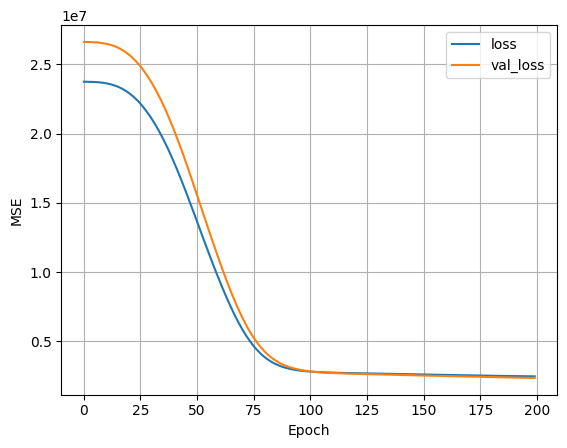

In [42]:
plot_loss(history)

In [43]:
# calculate the MSE for both linear reg and nn
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

5/5 [==============================] - 0s 4ms/step


In [45]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [46]:
MSE(y_pred_lr, y_test_all)

2089741.6746340618

In [47]:
MSE(y_pred_nn, y_test_all)

2198484.5232482

In [50]:
y_pred_lr

array([[3409.98680967],
       [3267.08584538],
       [5493.91266592],
       [3369.46705229],
       [6187.68662575],
       [4859.65028753],
       [6010.08117817],
       [4481.15541898],
       [3320.07033287],
       [6662.54763361],
       [3493.75053795],
       [4269.45268906],
       [5578.50682694],
       [4755.47634895],
       [2729.53894938],
       [5088.36194005],
       [2276.00726359],
       [3810.46357352],
       [2493.18242008],
       [4509.15232207],
       [2709.95917182],
       [5957.60514724],
       [5445.73253352],
       [4241.28111443],
       [5775.10034938],
       [5275.76608819],
       [5982.07840056],
       [5539.3413973 ],
       [3935.01672591],
       [6334.54964374],
       [3257.72191916],
       [4816.19483388],
       [3916.80677433],
       [5163.16914956],
       [4407.72390998],
       [4967.95132763],
       [4298.82529266],
       [3965.75915549],
       [2400.17113352],
       [4509.15232207],
       [5003.76777903],
       [3085.533

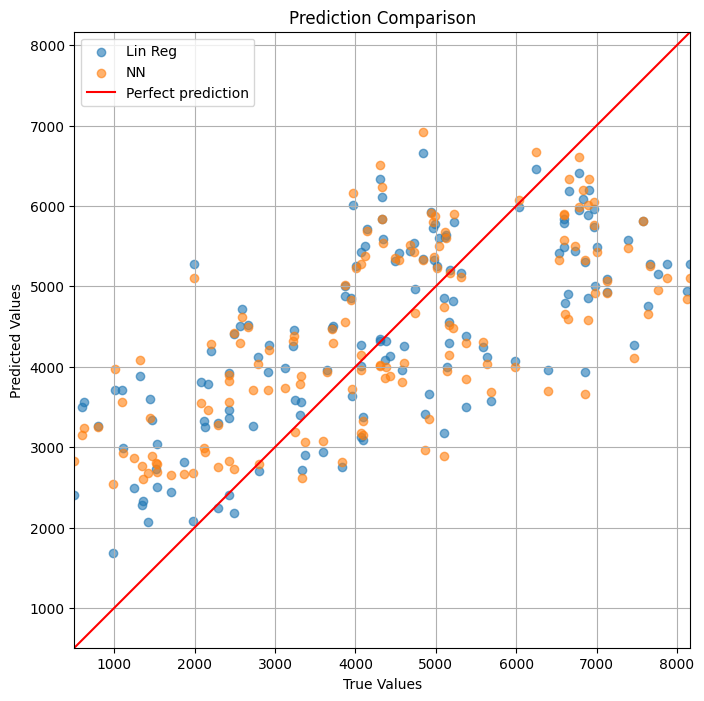

In [53]:
plt.figure(figsize=(8, 8))
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg", alpha=0.6)
plt.scatter(y_test_all, y_pred_nn, label="NN", alpha=0.6)
lims = [min(y_test_all.min(), y_pred_lr.min(), y_pred_nn.min()),
        max(y_test_all.max(), y_pred_lr.max(), y_pred_nn.max())]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, 'r-', label="Perfect prediction")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.title("Prediction Comparison")
plt.show()